In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [6]:
df = pd.read_csv("all_books.csv",index_col=0)
li = sum([len(df['text'][i]) for i in range(0,len(df)) if list(df['author'])[i] == 'austen'])
def author_word_counts():
    counts = []
    for author in df['author'].unique():
        x = sum([len(df['text'][i]) for i in range(0,len(df)) if list(df['author'])[i] == author])/1000000
        counts.append(x)
    return counts
author_word_counts()

[3.408002,
 10.816123,
 1.477243,
 1.541803,
 1.154954,
 0.246492,
 5.270853,
 0.657671,
 0.268195,
 3.683216,
 4.411002,
 0.544641]

([<matplotlib.axis.XTick at 0x1a187c29e8>,
 <a list of 12 Text xticklabel objects>)

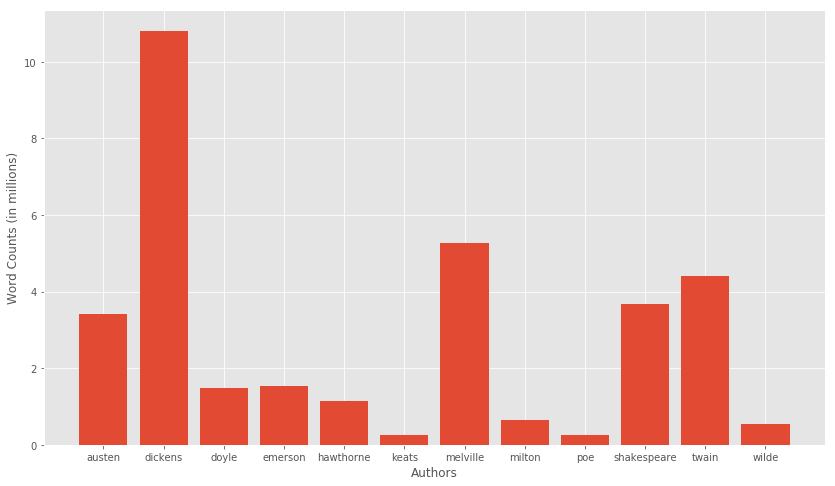

In [241]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(14,8))
plt.bar(np.arange(12),author_word_counts())
plt.xlabel("Authors")
plt.ylabel("Word Counts (in millions)")
plt.xticks(np.arange(12), df['author'].unique())

In [7]:
df.head()

,author,title,text
0,austen,Emma-JA,"['volume', 'chapter', 'emma', 'woodhouse', 'ha..."
1,austen,LS-JA,"['lady', 'susan', 'vernon', 'mr', 'vernon', 'l..."
2,austen,Mansfield-JA,"['chapter', 'thirty', 'year', 'ago', 'miss', '..."
3,austen,Northranger_Abbey-JA,"['advertisement', 'authoress', 'northanger', '..."
4,austen,PP_JA,"['chapter', '1', 'truth', 'universally', 'ackn..."


In [8]:
#Vectorize and transform data

In [9]:
Bartleby = CountVectorizer()

In [10]:
X_train_counts= Bartleby.fit_transform(df['text'])

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer

In [12]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)

In [13]:
X_train_tf = tf_transformer.transform(X_train_counts)

In [14]:
#Split data into testing and training sets

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X_train_tf,df['author'],train_size=.8,random_state=6,stratify=df['author'])

/Users/lukeborsare/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [16]:
#First model I'm trying basic SVM with default kernal, saw significant improvement from switching to linear
#Unresponsive to tuning, moving on to SGDC

In [17]:
from sklearn.svm import SVC

In [18]:
Homer = SVC(probability=True,kernel="linear")

In [19]:
Homer.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [20]:
Homer.score(X_test,y_test)

0.9487179487179487

In [43]:
print(classification_report(y_test, Homer.predict(X_test)))

              precision    recall  f1-score   support

      austen       1.00      1.00      1.00         1
     dickens       0.80      1.00      0.89         4
       doyle       1.00      1.00      1.00         4
     emerson       1.00      1.00      1.00         2
   hawthorne       1.00      0.50      0.67         2
       keats       0.80      1.00      0.89         4
    melville       1.00      1.00      1.00         2
      milton       1.00      1.00      1.00         2
         poe       1.00      0.67      0.80         3
 shakespeare       1.00      1.00      1.00         8
       twain       1.00      1.00      1.00         3
       wilde       1.00      1.00      1.00         4

   micro avg       0.95      0.95      0.95        39
   macro avg       0.97      0.93      0.94        39
weighted avg       0.96      0.95      0.94        39



In [45]:
from sklearn.model_selection import cross_validate

In [49]:
homer_cv_score = cross_validate(Homer,X_train_tf,y=df['author'],cv=5)

In [48]:
homer_cv_score['test_score'].mean()

0.8885351462642845

In [22]:
#baseline SGD

In [23]:
from sklearn.linear_model import SGDClassifier

In [24]:
Dante = SGDClassifier()

In [25]:
Dante.fit(X_train,y_train)

/Users/lukeborsare/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
Dante.score(X_test,y_test)

0.8974358974358975

In [27]:
from sklearn.model_selection import cross_validate

In [28]:
dante_cv_score = cross_validate(Dante,X_train_tf,y=df['author'],cv=5)

/Users/lukeborsare/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [29]:
dante_cv_score['test_score'].mean()

0.8857162597244675

In [50]:
#Tuned SGDClassifier using squared loss regression

In [64]:
Tolstoy = SGDClassifier(loss='squared_loss',learning_rate="adaptive",eta0=.41,
                         max_iter=250,penalty='l2')

In [65]:
Tolstoy.fit(X_train,y_train)

/Users/lukeborsare/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.41, fit_intercept=True,
       l1_ratio=0.15, learning_rate='adaptive', loss='squared_loss',
       max_iter=250, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       tol=None, validation_fraction=0.1, verbose=0, warm_start=False)

In [66]:
Tolstoy.score(X_test,y_test)

1.0

In [67]:
#SGD SVM is a massive improvement even without tuning, sticking with this model for now

In [69]:
tolstoy_cv_score = cross_validate(Tolstoy,X_train_tf,y=df['author'],cv=5)

/Users/lukeborsare/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [70]:
tolstoy_cv_score['test_score'].mean()

0.9294476916911938

In [37]:
#classification report to identify class accuracy and recall

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
print(classification_report(y_test, Tolstoy.predict(X_test)))

              precision    recall  f1-score   support

      austen       1.00      1.00      1.00         1
     dickens       1.00      1.00      1.00         4
       doyle       1.00      1.00      1.00         4
     emerson       1.00      1.00      1.00         2
   hawthorne       1.00      1.00      1.00         2
       keats       1.00      1.00      1.00         4
    melville       1.00      1.00      1.00         2
      milton       1.00      1.00      1.00         2
         poe       1.00      1.00      1.00         3
 shakespeare       1.00      1.00      1.00         8
       twain       1.00      1.00      1.00         3
       wilde       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [80]:
test_text = """
FILL OUT YOUR ATTENDANCE
"""

In [81]:
len(test_text)/5

5.2

In [82]:
def classify_text(string):
    st = [string]
    tf_transformer.transform(Bartleby.transform(st))
    return Tolstoy.predict(tf_transformer.transform(Bartleby.transform(st)))

In [83]:
classify_text(test_text)

array(['poe'], dtype='<U11')

In [ ]:
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = list(df['author'].unique())
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names, rotation='vertical')
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()


In [ ]:
## Confusion Matrices for different models

In [ ]:
#SVC with no tuning

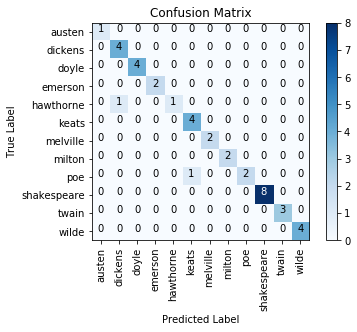

In [44]:
show_cf(y_test, Homer.predict(X_test))

In [ ]:
## Tuned SGDC

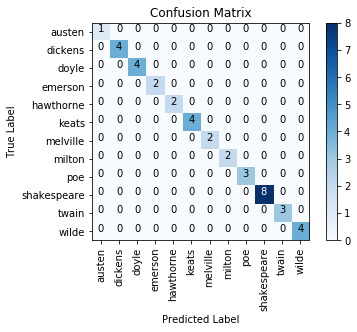

In [57]:
show_cf(y_test, Tolstoy.predict(X_test))

In [62]:
#Plot AUC
def plotauc():
    X = X_train_tf
    y = df['author']

    # Binarize the output
    y = label_binarize(y, classes=['austen', 'dickens', 'doyle', 'emerson', 'hawthorne', 'keats',
           'melville', 'milton', 'poe', 'shakespeare', 'twain', 'wilde'])
    n_classes = y.shape[1]

    X_train,X_test,y_train,y_test = train_test_split(X_train_tf,y,train_size=.8,stratify=y,random_state=6)

    classifier = OneVsRestClassifier(SGDClassifier(loss='squared_loss',learning_rate="adaptive",eta0=.41,l1_ratio=0,max_iter=250,alpha=0.0001,penalty='l2',class_weight="balanced",average=True))
    y_score = classifier.fit(X_train, y_train).predict(X_test)
    classes=['austen', 'dickens', 'doyle', 'emerson', 'hawthorne', 'keats',
           'melville', 'milton', 'poe', 'shakespeare', 'twain', 'wilde']
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['navy', 'blue', 'deepskyblue', 'green', 'limegreen', 'yellow', 'orange', 'red', 'deeppink', 'pink', 'm', 'purple'])
    plt.figure(figsize=(10,8))
    for i, color,cl in zip(range(n_classes), colors,classes):
        plt.plot(fpr[i], tpr[i], color=color, linewidth=2,
                 label='ROC curve of {0} (area = {1:0.2f})'
                 ''.format(cl, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    return classifier

/Users/lukeborsare/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/lukeborsare/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


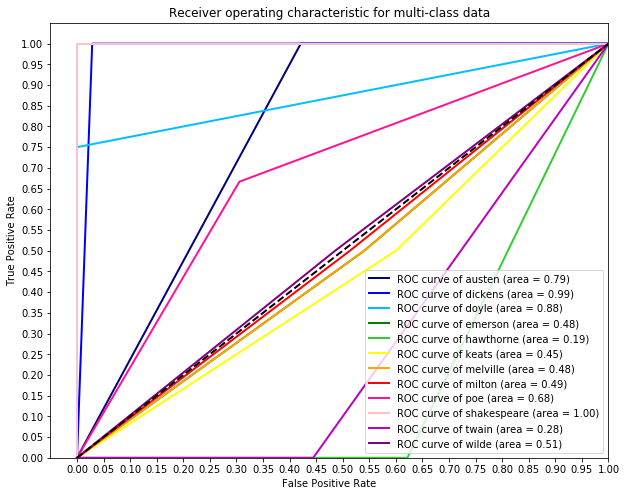

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=True, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.41, fit_intercept=True,
       l1_ratio=0, learning_rate='adaptive', loss='squared_loss',
       max_iter=250, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       tol=None, validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

In [63]:
plotauc()